In [ ]:
# 1. Removing players who have never score greater than 100 points. This also removes players from batting order 4.
# 2. 

   BattingOrder    Fantasy
0             1  59.669014
1             2  48.686041
2             3  31.110446
3             4  16.961111


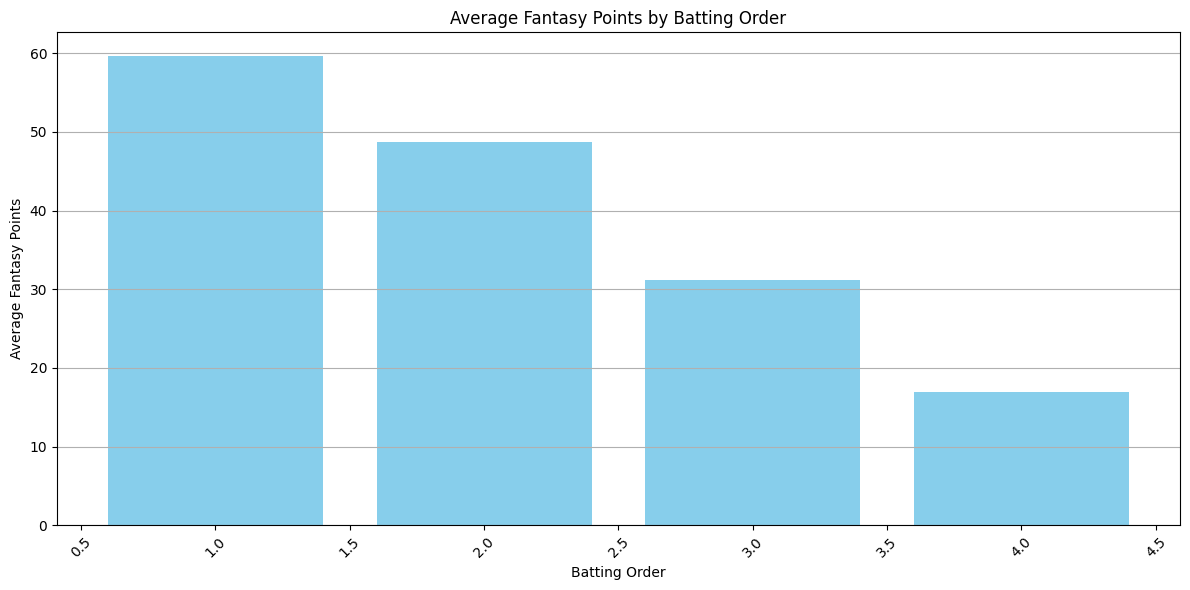

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file (replace with your actual file path)
csv_path = 'BatEngg (12).csv'  # Replace with your actual file path
data = pd.read_csv(csv_path)
batting_order_distribution = data.groupby('BattingOrder')['Fantasy'].mean().reset_index()
print(f"{batting_order_distribution}")

plt.figure(figsize=(12, 6))
plt.bar(batting_order_distribution['BattingOrder'], batting_order_distribution['Fantasy'], color='skyblue')
plt.title('Average Fantasy Points by Batting Order')
plt.xlabel('Batting Order')
plt.ylabel('Average Fantasy Points')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [5]:
# No need of this now.

# import pandas as pd

# # Load the CSV file (replace with your actual file path)
# csv_path = 'BatEngg (12).csv'  # Replace with your actual file path
# df = pd.read_csv(csv_path)

# # Check if the required column exists
# if 'BattingOrder' not in df.columns:
#     print("'BattingOrder' column not found in the CSV file.")
# else:
#     # Filter the DataFrame to keep entries with BattingOrder <= 3
#     filtered_df = df[df['BattingOrder'] <= 2]

#     # Save the filtered DataFrame to a new CSV file
#     new_csv_path = 'BatEngg (12).csv'  # Specify your output file path
#     filtered_df.to_csv(new_csv_path, index=False)

#     print(f"Filtered CSV file created at: {new_csv_path}")

Filtered CSV file created at: BatEngg (12).csv


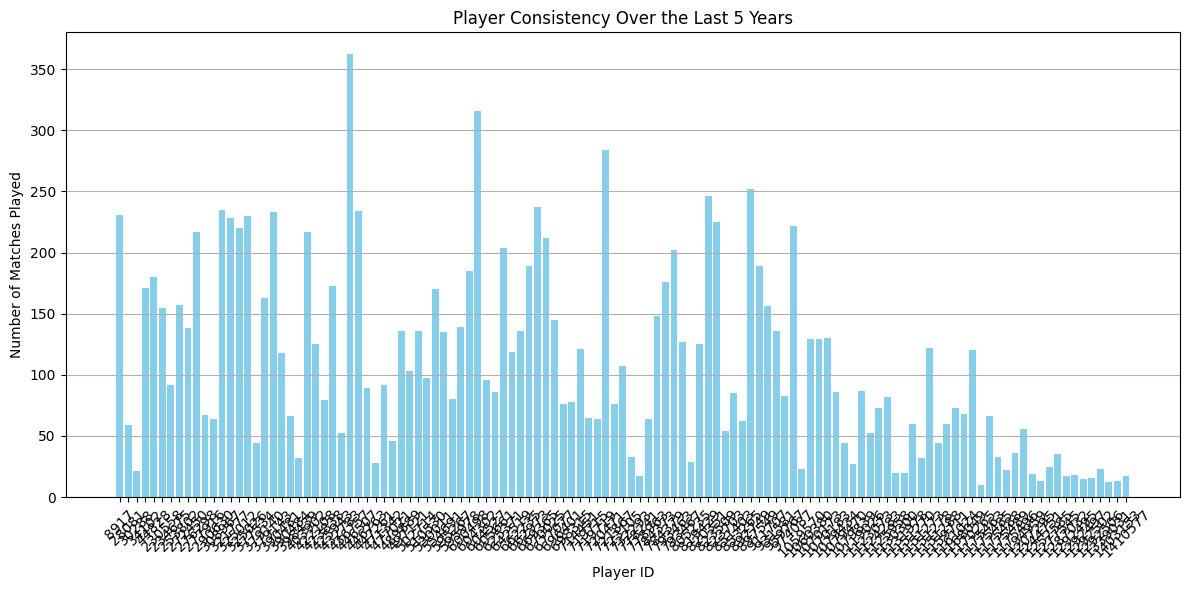

In [26]:
# how much the players has played over the last 5 years.

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Load the CSV file (replace with your actual file path)
csv_path = 'BatEngg (12).csv'  # Replace with your actual file path
df = pd.read_csv(csv_path)

# Check if the required columns exist
if 'MatchDate' not in df.columns or 'ID' not in df.columns:
    print("'MatchDate' or 'ID' column not found in the CSV file.")
else:
    # Convert 'MatchDate' to datetime
    df['MatchDate'] = pd.to_datetime(df['MatchDate'])

    # Get the date 5 years ago from today
    five_years_ago = datetime.now() - timedelta(days=5*365)

    # Filter the DataFrame for the last 5 years
    recent_matches = df[df['MatchDate'] >= five_years_ago]

    # Group by ID and count the number of matches played
    consistency = recent_matches.groupby('ID').size().reset_index(name='MatchesPlayed')

    # Plotting the consistency of players
    plt.figure(figsize=(12, 6))
    plt.bar(consistency['ID'].astype(str), consistency['MatchesPlayed'], color='skyblue')
    plt.title('Player Consistency Over the Last 5 Years')
    plt.xlabel('Player ID')
    plt.ylabel('Number of Matches Played')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

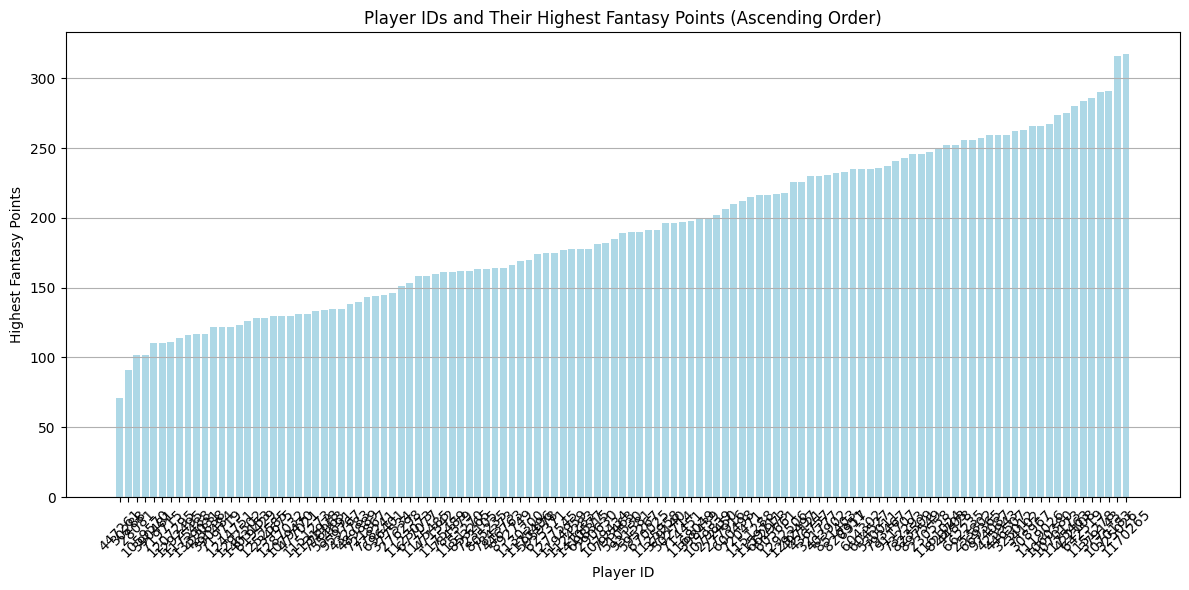

In [38]:
# show the players with fantasy points distribution.

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file (replace with your actual file path)
csv_path = 'BatEngg (12).csv'  # Replace with your actual file path
df = pd.read_csv(csv_path)

# Check if the required columns exist
if 'Fantasy' not in df.columns or 'ID' not in df.columns:
    print("'Fantasy' or 'ID' column not found in the CSV file.")
else:
    # Group by ID and calculate the maximum Fantasy points for each ID
    max_fantasy_points = df.groupby('ID')['Fantasy'].max().reset_index()

    # Sort the results in ascending order of Fantasy points
    max_fantasy_points_sorted = max_fantasy_points.sort_values(by='Fantasy', ascending=True)

    # Plotting the IDs and their highest Fantasy points
    plt.figure(figsize=(12, 6))
    plt.bar(max_fantasy_points_sorted['ID'].astype(str), max_fantasy_points_sorted['Fantasy'], color='lightblue')
    plt.title('Player IDs and Their Highest Fantasy Points (Ascending Order)')
    plt.xlabel('Player ID')
    plt.ylabel('Highest Fantasy Points')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

/var/folders/_w/4xfs9wld05nfzlbq4p03y6z80000gn/T/ipykernel_28948/2570500359.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(merged_counts['ID'].astype(str), rotation=45)  # Rotate x-axis labels for better readability


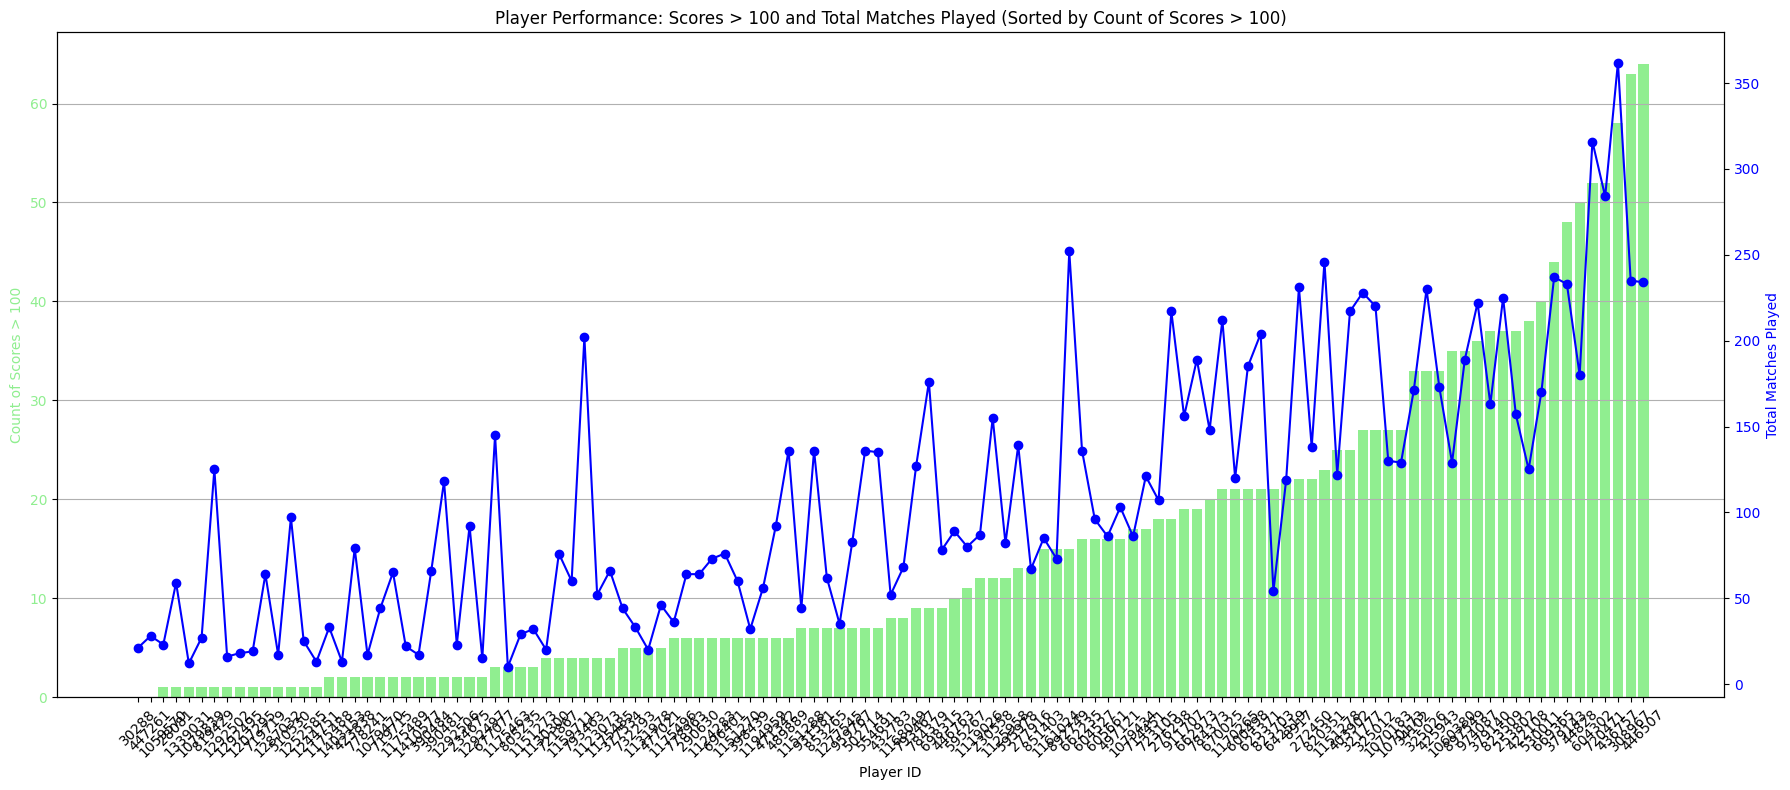

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file (replace with your actual file path)
csv_path = 'BatEngg (12).csv'  # Replace with your actual file path
df = pd.read_csv(csv_path)

# Check if the required columns exist
if 'Fantasy' not in df.columns or 'ID' not in df.columns:
    print("'Fantasy' or 'ID' column not found in the CSV file.")
else:
    # Filter the DataFrame for entries where Fantasy scores are greater than 100
    high_fantasy_scores = df[df['Fantasy'] > 100]

    # Group by ID and count the number of occurrences of scores > 100
    counts_high_scores = high_fantasy_scores.groupby('ID').size().reset_index(name='Count > 100')

    # Group by ID to count the total number of matches played
    counts_total_matches = df.groupby('ID').size().reset_index(name='Total Matches Played')

    # Merge the two counts into a single DataFrame
    merged_counts = pd.merge(counts_high_scores, counts_total_matches, on='ID', how='outer').fillna(0)

    # Define a threshold for significantly higher matches played
    threshold_factor = 2  # You can adjust this factor as needed
    merged_counts['Significantly Higher'] = merged_counts['Total Matches Played'] > (threshold_factor * merged_counts['Count > 100'])

    # Sort the DataFrame by Count > 100 in ascending order
    merged_counts = merged_counts.sort_values(by='Count > 100')

    # Plotting the counts
    fig, ax1 = plt.subplots(figsize=(18, 8))

    # Bar plot for counts of scores > 100
    ax1.bar(merged_counts['ID'].astype(str), merged_counts['Count > 100'], color='lightgreen', label='Count of Scores > 100')
    ax1.set_xlabel('Player ID')
    ax1.set_ylabel('Count of Scores > 100', color='lightgreen')
    ax1.tick_params(axis='y', labelcolor='lightgreen')
    ax1.set_xticklabels(merged_counts['ID'].astype(str), rotation=45)  # Rotate x-axis labels for better readability
    ax1.grid(axis='y')

    # Create a second y-axis for total matches played
    ax2 = ax1.twinx()
    ax2.plot(merged_counts['ID'].astype(str), merged_counts['Total Matches Played'], color='blue', marker='o', label='Total Matches Played')
    ax2.set_ylabel('Total Matches Played', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Mark points where matches played are significantly higher
    for i, row in merged_counts.iterrows():
        if row['Significantly Higher']:
            ax2.annotate('High Matches', 
                         xy=(row['ID'], row['Total Matches Played']), 
                         xytext=(row['ID'], row['Total Matches Played'] + 5),  # Adjust the position of the annotation
                         arrowprops=dict(facecolor='red', shrink=0.05),
                         fontsize=9, color='red')

    # Title and layout
    plt.title('Player Performance: Scores > 100 and Total Matches Played (Sorted by Count of Scores > 100)')
    fig.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

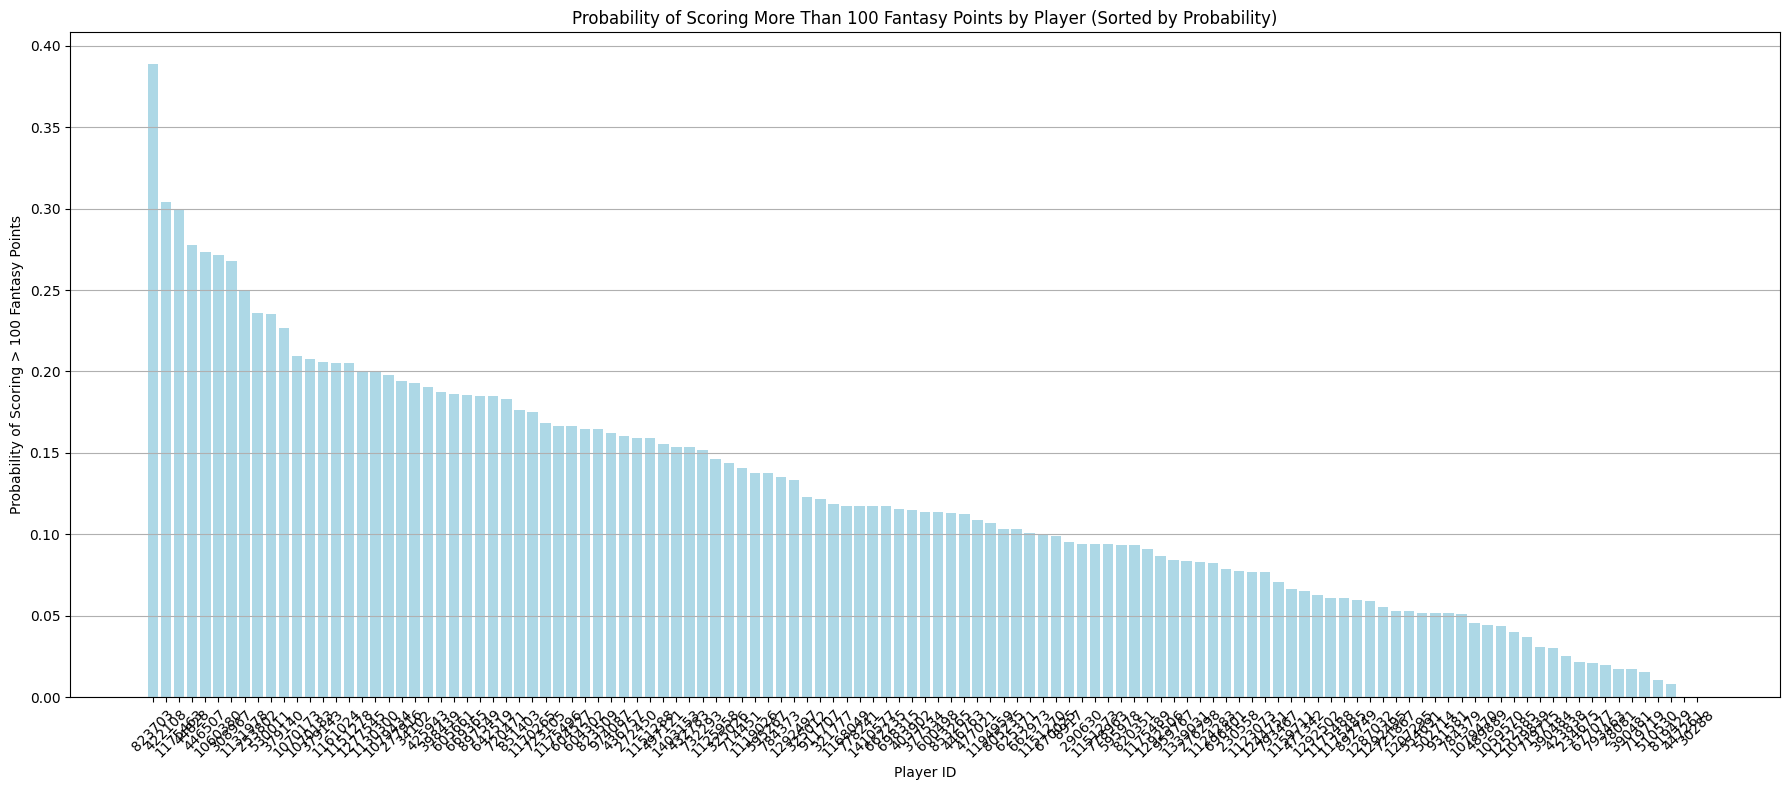

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file (replace with your actual file path)
csv_path = 'BatEngg (12).csv'  # Replace with your actual file path
df = pd.read_csv(csv_path)

# Check if the required columns exist
if 'Fantasy' not in df.columns or 'ID' not in df.columns:
    print("'Fantasy' or 'ID' column not found in the CSV file.")
else:
    # Group by ID to count the total number of matches played
    counts_total_matches = df.groupby('ID').size().reset_index(name='Total Matches Played')

    # Filter the DataFrame for entries where Fantasy scores are greater than 100
    high_fantasy_scores = df[df['Fantasy'] > 100]

    # Group by ID and count the number of occurrences of scores > 100
    counts_high_scores = high_fantasy_scores.groupby('ID').size().reset_index(name='Count > 100')

    # Merge the two counts into a single DataFrame
    merged_counts = pd.merge(counts_total_matches, counts_high_scores, on='ID', how='outer').fillna(0)

    # Calculate the probability of scoring more than 100 points
    merged_counts['Probability > 100'] = merged_counts['Count > 100'] / merged_counts['Total Matches Played']

    # Sort the DataFrame by Probability > 100 in descending order
    merged_counts = merged_counts.sort_values(by='Probability > 100', ascending=False)

    # Plotting the probabilities
    plt.figure(figsize=(18, 8))
    plt.bar(merged_counts['ID'].astype(str), merged_counts['Probability > 100'], color='lightblue')
    plt.xlabel('Player ID')
    plt.ylabel('Probability of Scoring > 100 Fantasy Points')
    plt.title('Probability of Scoring More Than 100 Fantasy Points by Player (Sorted by Probability)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

In [42]:
merged_counts

,ID,Total Matches Played,Count > 100,Probability > 100
71,823703,54,21.0,0.388889
23,422108,125,38.0,0.304000
101,1175463,10,3.0,0.300000
4,44828,180,50.0,0.277778
28,446507,234,64.0,0.273504
...,...,...,...,...
56,719719,64,1.0,0.015625
36,510530,97,1.0,0.010309
68,819429,125,1.0,0.008000
30,447261,28,0.0,0.000000


In [44]:
# Load the second CSV file that contains team names (replace with your actual file path)
team_csv_path = 'Drumsticks - PlayerWiseInfo.csv'  # Replace with your actual file path
team_df = pd.read_csv(team_csv_path)
merged_counts = pd.merge(merged_counts, team_df[['ID', 'Team', 'Name']], on='ID', how='left')
merged_counts

,ID,Total Matches Played,Count > 100,Probability > 100,Team,Name
0,823703,54,21.0,0.388889,RCB,Rajat Patidar
1,422108,125,38.0,0.304000,DC,Lokesh Rahul
2,1175463,10,3.0,0.300000,LSG,Yuvraj Chaudhary
3,44828,180,50.0,0.277778,DC,Faf du Plessis
4,446507,234,64.0,0.273504,MI,Suryakumar Yadav
...,...,...,...,...,...,...
114,719719,64,1.0,0.015625,GT,Shahrukh Khan
115,510530,97,1.0,0.010309,CHE,Jamie Overton
116,819429,125,1.0,0.008000,PBKS,Azmatullah Omarzai
117,447261,28,0.0,0.000000,MI,Deepak Chahar


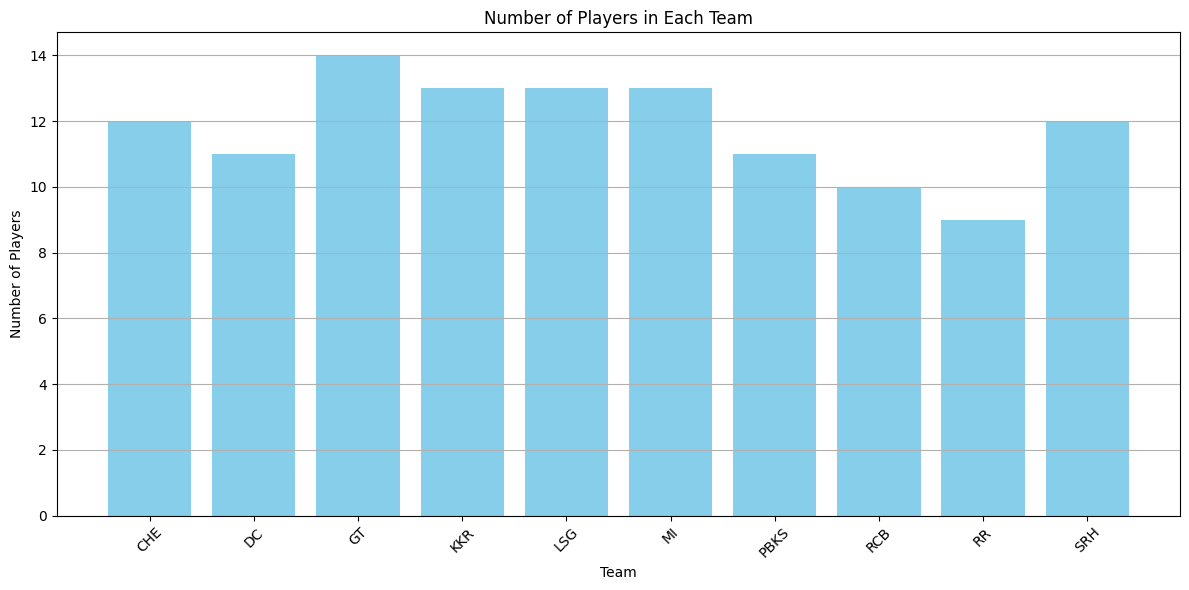

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_counts already contains the team names
# Example: merged_counts = ... (your previous code to create merged_counts)

# Check if 'Team' column exists
if 'Team' not in merged_counts.columns:
    print("'Team' column not found in merged_counts.")
else:
    # Group by 'Team Name' and count the number of players in each team
    team_counts = merged_counts.groupby('Team').size().reset_index(name='Number of Players')

    # Reset the index for plotting
    team_counts = team_counts.reset_index(drop=True)

    # Plotting the number of players for each team
    plt.figure(figsize=(12, 6))
    plt.bar(team_counts['Team'], team_counts['Number of Players'], color='skyblue')
    plt.xlabel('Team')
    plt.ylabel('Number of Players')
    plt.title('Number of Players in Each Team')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

In [53]:
# Check if 'Team' and 'ID' columns exist
if 'Team' not in merged_counts.columns or 'ID' not in merged_counts.columns or 'Probability > 100' not in merged_counts.columns:
    print("'Team', 'ID', or 'Probability > 100' column not found in merged_counts.")
else:
    # Group by 'Team' and get the top 8 IDs for each team based on probability
    top_ids_per_team = merged_counts.groupby('Team').apply(lambda x: x.nlargest(8, 'Probability > 100')).reset_index(drop=True)

    # Store the result in a new variable
    top_8_ids = top_ids_per_team[['ID', 'Name', 'Team', 'Probability > 100', 'Count > 100', 'Total Matches Played']]

         ID              Name Team  Probability > 100  Count > 100  \
0   1060380   Ruturaj Gaikwad  CHE           0.271318         35.0   
1    379140      Devon Conway  CHE           0.226994         37.0   
2    497121      Deepak Hooda  CHE           0.155340         16.0   
3    714451       Shivam Dube  CHE           0.140496         17.0   
4   1292497     Shaik Rasheed  CHE           0.133333          2.0   
..      ...               ...  ...                ...          ...   
75  1175496    K Nitish Reddy  SRH           0.166667          6.0   
76   436757  Heinrich Klaasen  SRH           0.160221         58.0   
77   432783       Sachin Baby  SRH           0.153846          8.0   
78  1125958     Atharva Taide  SRH           0.146341         12.0   
79   784373    Kamindu Mendis  SRH           0.135135         20.0   

    Total Matches Played  
0                    129  
1                    163  
2                    103  
3                    121  
4                     15

/var/folders/_w/4xfs9wld05nfzlbq4p03y6z80000gn/T/ipykernel_28948/720086607.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_ids_per_team = merged_counts.groupby('Team').apply(lambda x: x.nlargest(8, 'Probability > 100')).reset_index(drop=True)


In [55]:
# Specify the file path where you want to save the CSV
csv_file_path = 'top_performers_batting.csv'  # Replace with your desired file path

# Store the DataFrame into a CSV file
top_8_ids.to_csv(csv_file_path, index=False)  # Set index=False to avoid writing row indices

print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to top_performers_batting.csv


In [24]:
import pandas as pd

# Load the CSV file (replace with your actual file path)
csv_path = 'BatEngg (12).csv'  # Replace with your actual file path
df = pd.read_csv(csv_path)

# Check if the required column exists
if 'Fantasy' not in df.columns or 'ID' not in df.columns:
    print("'Fantasy' or 'ID' column not found in the CSV file.")
else:
    # Group by ID and calculate the maximum Fantasy score for each ID
    max_fantasy_scores = df.groupby('ID')['Fantasy'].max().reset_index()

    # Identify IDs whose highest fantasy scores are less than 100
    ids_to_remove = max_fantasy_scores[max_fantasy_scores['Fantasy'] < 100]['ID']

    # Filter the original DataFrame to exclude those IDs
    updated_df = df[~df['ID'].isin(ids_to_remove)]

    # Save the updated DataFrame back to the CSV file
    updated_df.to_csv(csv_path, index=False)

    print(f"Updated CSV file saved at: {csv_path}")

Updated CSV file saved at: BatEngg (12).csv


In [36]:
import pandas as pd
from datetime import datetime, timedelta

# Load the CSV file (replace with your actual file path)
csv_path = 'BatEngg (12).csv'  # Replace with your actual file path
df = pd.read_csv(csv_path)

# Check if the required column exists
if 'MatchDate' not in df.columns:
    print("'MatchDate' column not found in the CSV file.")
else:
    # Convert 'Match Date' to datetime
    df['MatchDate'] = pd.to_datetime(df['MatchDate'])

    # Get the date 5 years ago from today
    five_years_ago = datetime.now() - timedelta(days=5*365)

    # Filter the DataFrame to keep only rows with Match Date within the last 5 years
    updated_df = df[df['MatchDate'] >= five_years_ago]

    # Save the updated DataFrame back to the CSV file
    updated_df.to_csv(csv_path, index=False)

    print(f"Updated CSV file saved at: {csv_path}")

Updated CSV file saved at: BatEngg (12).csv
